In [ ]:
!pip install tensorflow keras numpy mnist matplotlib

In [46]:
from PIL import Image
from pylab import *
import PIL.ImageOps   
from PIL import Image
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

2250000
(1000, 750, 1)
750000


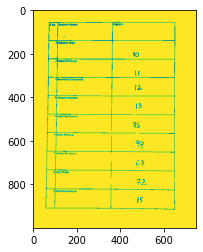

(1000, 750)


In [8]:
#######----------- CONVERT IMAGE TO PIXELS ----------#########

full=Image.open('new.jpeg')
full = full.resize((750,1000))
full.size
full=array(full)
# print(full)
# print(img.shape)
# print(full.size)
print(full.size) #750,1000
if(full.size>=750000):
  full=full[0:1000,0:750,0:1]
print(full.shape)
print(full.size)
full=full.reshape((-1,750000))
full=(full-np.min(full))
full=full/np.max(full)
full=full*255
full=np.where(full<100, 0, full)
full=np.where(full>=100, 255, full)
pixels=full.reshape((1000,750))
plt.imshow(pixels)
plt.show()
print(pixels.shape)
pixels2=pixels


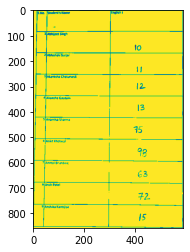

In [27]:
###########-------- Removing top, bottom, left and right white spaces from photograph ------------#############
pixels=pixels2
row_sums = pixels.sum(axis=1)
column_sums = pixels.sum(axis=0)
# print(pixels.shape)
while average(pixels[0])>240:
  pixels = np.delete(pixels, 0, 0) #delete top white space
while average(pixels[pixels.shape[0]-1])>240:
  pixels = np.delete(pixels, pixels.shape[0]-1, 0) #delete bottom white space
# print(pixels.shape)

start=0
while column_sums[start]>=column_sums[0]:
  start=start+1
pixels=pixels[:,start:] #delete left whitespaces
column_sums = pixels.sum(axis=0)

start=pixels.shape[1]-1
while column_sums[start]>=column_sums[0]:
  start=start-1
pixels=pixels[:,0:start] #delete right whitespaces

# print(pixels[0])
plt.imshow(pixels)
plt.show()
# print(pixels[0])

data = Image.fromarray(pixels)
data = data.convert("L")

# print(type(data))
# data.save('test.jpg')

# print(pixels[0])

14697


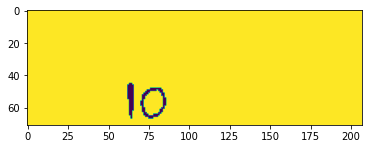

(71, 207)
207
2
(22, 4)
6 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


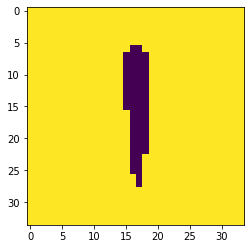

(19, 16)
5 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


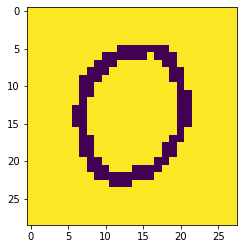

14697


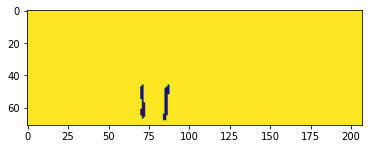

(71, 207)
207
2
(21, 3)
5 14


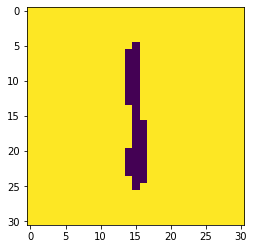

(22, 4)
6 15


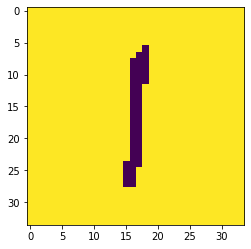

14697


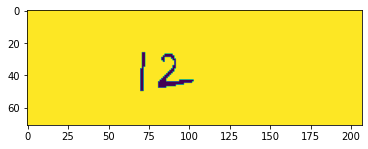

(71, 207)
207
2
(24, 3)
6 17


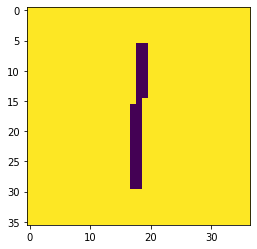

(21, 22)
5 5


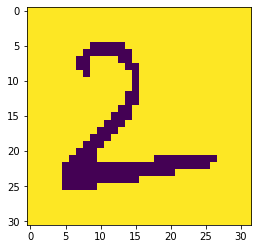

14697


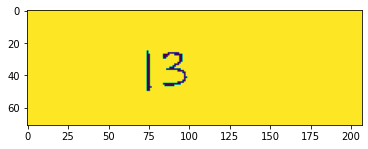

(71, 207)
207
2
(25, 3)
6 17


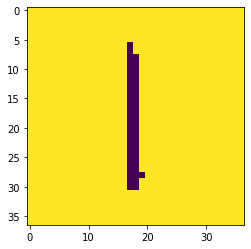

(21, 15)
5 8


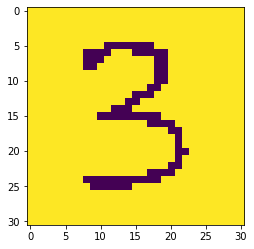

14697


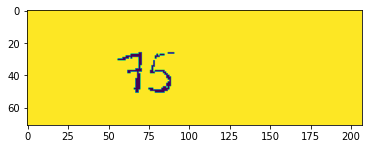

(71, 207)
207
2
(25, 15)
6 11


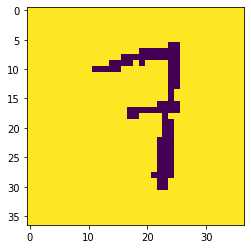

(25, 16)
6 11


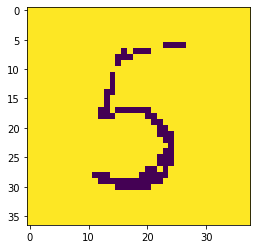

14697


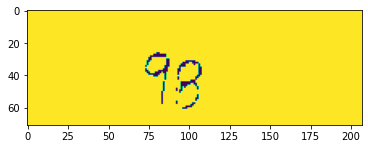

(71, 207)
207
2
(32, 15)
8 17


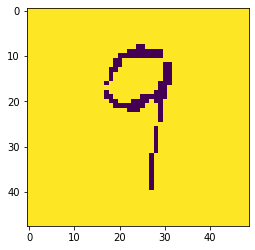

(30, 16)
8 15


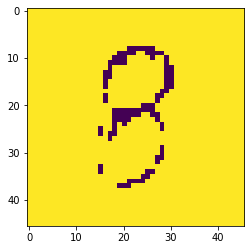

14697


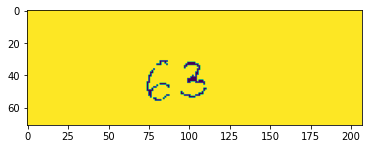

(71, 207)
207
2
(25, 14)
6 12


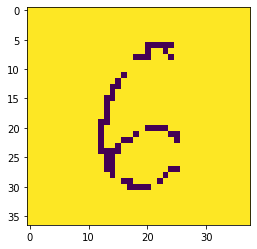

(22, 16)
6 9


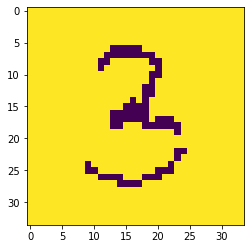

14697


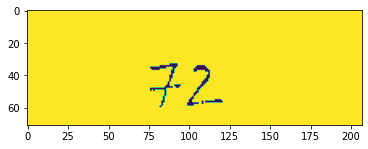

(71, 207)
207
2
(24, 19)
6 9


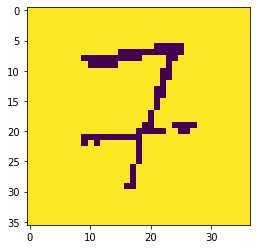

(25, 22)
6 8


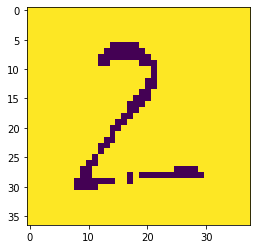

14697


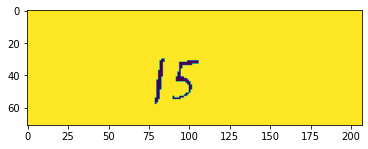

(71, 207)
207
2
(28, 6)
7 18


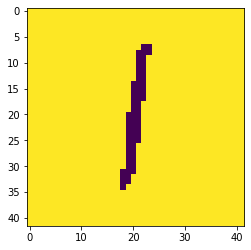

(24, 16)
6 10


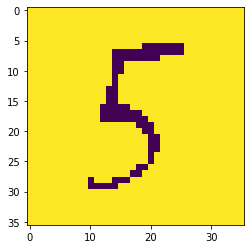

In [42]:
########-------Splitting big image to small images (getting number in each row)-------#########

im=data
no_of_entries = 10
l = [] #list to keep all rows in form of images.
for i in range(0, no_of_entries):
  width, height = im.size
  fiveper = height*9//(no_of_entries*100)
  fiftper = width*15/200
  left = (width/2)+fiftper
  right = width-fiftper
  top = i*int(height//no_of_entries)+fiveper
  bottom = int(height//no_of_entries)*(i+1)-fiveper
  # print(bottom)
  im1 = im.crop((left, top, right, bottom))
  # imhk = im1.save("testcrop.jpg")
  l.append(im1)
# # To save the list of cropped images
x=0
for i in l:
  if x!=0:
    get_value(i)
    ikj=i.save("new\ "+str(x)+".jpg")
  x=x+1

# get_value(l[1])

In [18]:
def get_separate_digits(x):
  if x==0:
    return
    global all_digits
  global column_sums
  global pixels

  column_sums = pixels.sum(axis=0)
  start=0
  # print(len(column_sums))
  whiteval=column_sums[0]
  while column_sums[start]>=whiteval:
    start=start+1
    if(start==len(column_sums)):
      return
  pixels=pixels[:,start:] #delete left whitespaces
  column_sums=column_sums[start:]
  end=0
  start=0
  while column_sums[end]<whiteval:
    end=end+1
  # print(pixels[:,start:end])
  all_digits.append(pixels[:,start:end])  
  
  pixels=pixels[:,end:]
  
  column_sums=column_sums[end:]
  get_separate_digits(len(column_sums))

def remove_space_top_bottom(i):
  row_sums = i.sum(axis=1)
  column_sums = i.sum(axis=0)
  # print(pixels.shape)
  while average(i[0])>240:
    i = np.delete(i, 0, 0) #delete top white space
  while average(i[i.shape[0]-1])>240:
    i = np.delete(i, i.shape[0]-1, 0) #delete bottom white space
#   print(pixels.shape)
  return i

In [41]:

all_digits=[]
pixels
column_sums

def get_value(imgc):
  global pixels
  global column_sums
  height=imgc.size[1]
  width=imgc.size[0]
  mul=width*height
  imgc = imgc.resize((width,height))
  imgc=array(imgc)

  # print(img.shape)
  # print(img.size)
  print(imgc.size)
  if(imgc.size>mul):
    imgc=imgc[0:height,0:width,0:1]
  # print(img.shape)
  # print(img.size)
  imgc=imgc.reshape((-1,mul))
  imgc=(imgc-np.min(imgc))
  imgc=imgc/np.max(imgc)
  imgc=imgc*255
  imgc=np.where(imgc<200, 0, imgc)
  imgc=np.where(imgc>=200, 255, imgc)
  pixels=imgc.reshape((height,width))
  plt.imshow(pixels)
  plt.show()
  # print(pixels)
  pixels2=pixels


  pixels=pixels2
  column_sums = pixels.sum(axis=0)
  column_sums_orig=column_sums
  # print(column_sums)
  lastleft=0
  # pix=get_digit() 
  # print(pix)
  # pix=pix.reshape((30,))
  # pix.shape
  # plt.imshow(pix)
  # plt.show()
  # print(lastleft)
  # print(column_sums)

  global all_digits
  all_digits=[]

  print(pixels.shape)
  print(len(column_sums))
  get_separate_digits(len(column_sums))

  # print(all_digits)
  for i in all_digits:
    all_digits[all_digits.index(i)]=remove_space_top_bottom(i)
    # print(i)
    # plt.imshow(i)
    # plt.show()
    # print(pixels)
  # for i in all_digits:
  #   # all_digits[all_digits.index(i)]=remove_space_top_bottom(i)
  #   # print(i)
    
  #   plt.imshow(i)
  #   plt.show()
  print(len(all_digits))


  ##### adding border to numbers to bring in dimensions similar to MNIST ######

  for i in all_digits:
    print(i.shape)
    w=i.shape[1]
    h=i.shape[0]

    h2=18
    w2=h2*w/h
    top=int(floor(((28-h2)*h)/(2*h2)))
    left=  int(floor(((28-w2)*w)/(2*w2)))
    print(top,left)
  
    topwhite = [[255]*w]*top
    itemp=i
    i = np.append(topwhite, i, axis=0)
    i = np.append(i, topwhite, axis=0)

    leftwhite=[[255]*left]*(h+(2*top))
    i = np.append(leftwhite, i, axis=1)
    i = np.append(i, leftwhite, axis=1)
  
    all_digits[all_digits.index(itemp)]=i
    plt.imshow(i)
    plt.show()
    # print(i)
    # data = Image.fromarray(i)
    # data = data.convert("L")
    # print(data)
    # data.save('test'+str(counter)+'.jpg')
    # # counter=counter+1

  



    # tempimg.save(str(height)+".jpg");



# imgxx=Image.open('10.jpeg')
# get_value(imgxx)